In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [19]:
data_train = pd.read_csv(r"C:\Users\Krishna Kant Sinha\Downloads\titanic_train.csv")
data_test = pd.read_csv(r"C:\Users\Krishna Kant Sinha\Downloads\titanic_train.csv")

In [20]:
train = data_train.copy()
test = data_test.copy()
train.head()
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
print(train.info())
print('\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   S

In [22]:
train['Cabin'] = train['Cabin'].str.get(0)
test['Cabin'] = test['Cabin'].str.get(0)

In [ ]:
num_data = train[['Age', 'SibSp', 'Parch', 'Fare']]
cat_data = train[['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']]

In [ ]:
fig, ax = plt.subplots(2, 2 ,figsize = (12,8))
fig.tight_layout(pad=5.0)

sns.distplot(ax = ax[0, 0], a = num_data['Age'].dropna())
ax[0, 0].set_title('Age', fontsize = 18)

sns.distplot(ax = ax[0, 1], a = num_data['SibSp'].dropna())
ax[0, 1].set_title('SibSp', fontsize = 18)

sns.distplot(ax = ax[1, 0], a = num_data['Parch'].dropna())
ax[1, 0].set_title('Parch', fontsize = 18)

sns.distplot(ax = ax[1, 1], a = num_data['Fare'].dropna())
ax[1, 1].set_title('Fare', fontsize = 18)

plt.show()

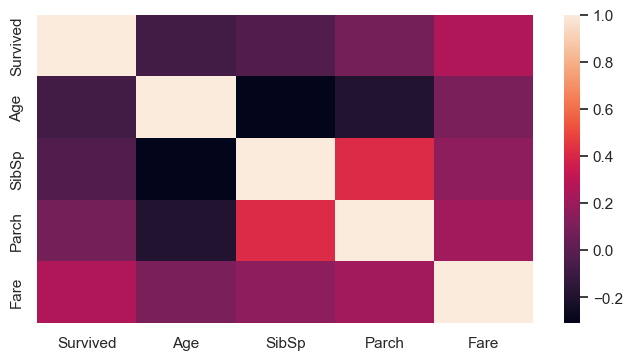

In [24]:
heatmapdata = train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]

cormat = heatmapdata.corr()
fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(data = cormat)
plt.show()

In [ ]:
fig, ax = plt.subplots(cat_data.shape[1], 1, figsize = (8,16))
fig.tight_layout(pad=5.0)

for i, n in enumerate(cat_data):
        sns.barplot(ax = ax[i], x = cat_data[n].fillna('NaN').value_counts().index, y = cat_data[n].fillna('NaN').value_counts())
        ax[i].set_title(n)
plt.show()

In [ ]:
test.insert(1, 'Survived', -1)
test.info()
print('Train :\n',train.isnull().sum())
print('\n')
print('Test :\n', test.isnull().sum())

In [ ]:
train['Age'].fillna(train['Age'].median(), inplace = True)
test['Age'].fillna(train['Age'].median(), inplace = True)

train['Fare'].fillna(train['Fare'].median(), inplace = True)
test['Fare'].fillna(train['Fare'].median(), inplace = True)

train.dropna(subset=['Embarked'] , inplace = True)

In [ ]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)
print('Train :\n',train.isnull().sum())
print('\n')
print('Test :\n', test.isnull().sum())

In [ ]:
train['LastName'] = train['Name'].str.split(',', expand=True)[0]
test['LastName'] = test['Name'].str.split(',', expand=True)[0]
train.head()

In [ ]:
train['Train'] = 1
test['Train'] = 0

alldata = pd.concat((train, test), sort = False).reset_index(drop = True)

sur_data = []
died_data = []
for index, row in alldata.iterrows():
    s = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==1)]
    d = alldata[(alldata['LastName']==row['LastName']) & (alldata['Survived']==0)]
    
    s=len(s)
    if row['Survived'] == 1:
        s-=1

    d=len(d)
    if row['Survived'] == 0:
        d-=1
        
    sur_data.append(s)
    died_data.append(d)
    
alldata['FamilySurvived'] = sur_data
alldata['FamilyDied'] = died_data

In [ ]:
train = alldata[alldata['Train'] == 1]
test = alldata[alldata['Train'] == 0]

In [ ]:
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3-q1
train = train[~((train['Age'] < (q1 - 1.5 * iqr)) | (train['Age'] > (q3+1.5*iqr)))]

q1=train['Fare'].quantile(0.25)
q3 = train['Fare'].quantile(0.75)
iqr = q3-q1
train = train[~ ((train['Fare'] < q1 - 1.5 * iqr) | (train['Fare'] > (q3 + 1.5 * iqr)))]

In [ ]:
train['Fare'] = np.log1p(train['Fare']) # the same as np.log(train['Fare'] + 1)
test['Fare'] = np.log1p(test['Fare']) # the same as np.log(test['Fare'] + 1)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1, 2 ,figsize = (16,4))
sns.distplot(ax = ax[0], a = train['Age'])
sns.distplot(ax = ax[1], a = train['Fare'])
plt.show()

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['Pclass'])
train['Pclass'] = le.transform(train['Pclass'])
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, drop = 'first', categories = 'auto')
ohe.fit(train[['Sex', 'Embarked']])
ohecategory_train = ohe.transform(train[['Sex', 'Embarked']])
ohecategory_test = ohe.transform(test[['Sex', 'Embarked']])

for i in range(ohecategory_train.shape[1]):
    train['dummy_variable_' + str(i)] = ohecategory_train[:,i]

for i in range(ohecategory_test.shape[1]):
    test['dummy_variable_' + str(i)] = ohecategory_test[:,i]


print('Train shape :', train.shape)
print('Test shape :', test.shape)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train[['Age', 'SibSp', 'Parch', 'Fare']])
train[['Age', 'SibSp', 'Parch', 'Fare']] = sc.transform(train[['Age', 'SibSp', 'Parch', 'Fare']])
test[['Age', 'SibSp', 'Parch', 'Fare']] = sc.transform(test[['Age', 'SibSp', 'Parch', 'Fare']])

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

In [ ]:
train.head()

In [ ]:
train.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'LastName', 'Train'], axis = 1, inplace = True)
test.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked', 'LastName', 'Train'], axis = 1, inplace = True)

In [ ]:
print('Train columns :\n',train.columns)
print('Train shape : ', train.shape)
print('\n')
print('Test columns :\n',test.columns)
print('Test shape : ', test.shape)

In [ ]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

print('X_train :\n', X_train[0:5])
print('y_train :\n', y_train[0:5])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 12, p = 1, weights = 'distance')
accuracies = cross_val_score(clf, X_train, y_train, cv = 10)
print('Accuracies : ', accuracies)
print('AVG Accuracies : ', accuracies.mean())
print('STD:',accuracies.std())

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred = y_pred.astype('int64')

submission = pd.DataFrame()
submission['PassengerId'] = data_test['PassengerId']
submission['Survived'] = y_pred
submission['Survived'].value_counts()